In [1]:
import numpy as np

In [2]:
def mode_n_product(x, m, mode):
    x = np.asarray(x)
    m = np.asarray(m)
    if mode < 0:
        raise ValueError('`mode` must be a positive interger')
    if x.ndim < mode:
        raise ValueError('Invalid shape of X for mode = {}: {}'.format(mode, x.shape))
    if m.ndim != 2:
        raise ValueError('Invalid shape of M: {}'.format(m.shape))
    return np.swapaxes(np.swapaxes(x, mode, -1).dot(m.T), mode, -1)

def mode_n_flattening(arr, mode):
    if mode < 0 or mode >= arr.ndim:
        raise ValueError('Invalid mode value.')

    # Permute the mode axis to the front
    permuted_arr = np.moveaxis(arr, mode, 0)

    # Reshape the array
    flattened_arr = permuted_arr.reshape(permuted_arr.shape[0], -1)

    return flattened_arr


## HOSVD

In [3]:
# A = np.random.random((10, 20, 30))
# A = np.random.random((10, 10, 10))
A = np.random.random((50, 50, 50))
U = list()
S, V = list(), list()

for i in range(A.ndim):
    Am = mode_n_flattening(A, i)
    Um, Sm, Vhm = np.linalg.svd(Am, full_matrices=True)
    U.append(Um)
    S.append(Sm)
    V.append(Vhm)

G = A.copy()

for i in range(A.ndim):
    G = mode_n_product(G, U[i].T, i)

In [4]:
A_ = G.copy()

for i in range(A_.ndim):
    A_ = mode_n_product(A_, U[i], i)

In [5]:
A[0, 0]

array([0.57447501, 0.61769251, 0.00892258, 0.33743958, 0.85950244,
       0.1182456 , 0.56218253, 0.53517787, 0.26905995, 0.38527752,
       0.84144974, 0.0095757 , 0.16693551, 0.94244789, 0.24410654,
       0.54757196, 0.8199668 , 0.37224666, 0.01374689, 0.36847936,
       0.70957743, 0.33119884, 0.42386108, 0.77848736, 0.04975716,
       0.29252485, 0.22349646, 0.05990492, 0.96343883, 0.35284918,
       0.81515279, 0.39064336, 0.10245162, 0.89859297, 0.38670952,
       0.811612  , 0.59511668, 0.14618685, 0.33445075, 0.90461573,
       0.72867404, 0.31905089, 0.5653771 , 0.96343058, 0.53978706,
       0.02682899, 0.42545996, 0.09451814, 0.17088002, 0.90096552])

In [6]:
A_[0, 0]

array([0.57447501, 0.61769251, 0.00892258, 0.33743958, 0.85950244,
       0.1182456 , 0.56218253, 0.53517787, 0.26905995, 0.38527752,
       0.84144974, 0.0095757 , 0.16693551, 0.94244789, 0.24410654,
       0.54757196, 0.8199668 , 0.37224666, 0.01374689, 0.36847936,
       0.70957743, 0.33119884, 0.42386108, 0.77848736, 0.04975716,
       0.29252485, 0.22349646, 0.05990492, 0.96343883, 0.35284918,
       0.81515279, 0.39064336, 0.10245162, 0.89859297, 0.38670952,
       0.811612  , 0.59511668, 0.14618685, 0.33445075, 0.90461573,
       0.72867404, 0.31905089, 0.5653771 , 0.96343058, 0.53978706,
       0.02682899, 0.42545996, 0.09451814, 0.17088002, 0.90096552])

In [7]:
# U_trunk = [U[i][:, :U[i].shape[-1]//2] for i in range(A.ndim)]
U_trunk = [U[i][:, :-1] for i in range(A.ndim)]
G = A.copy()

for i in range(A.ndim):
    G = mode_n_product(G, U_trunk[i].T, i)

A_ = G.copy()

for i in range(A_.ndim):
    A_ = mode_n_product(A_, U_trunk[i], i)

In [8]:
G.shape

(49, 49, 49)

In [9]:
A[0, 0]

array([0.57447501, 0.61769251, 0.00892258, 0.33743958, 0.85950244,
       0.1182456 , 0.56218253, 0.53517787, 0.26905995, 0.38527752,
       0.84144974, 0.0095757 , 0.16693551, 0.94244789, 0.24410654,
       0.54757196, 0.8199668 , 0.37224666, 0.01374689, 0.36847936,
       0.70957743, 0.33119884, 0.42386108, 0.77848736, 0.04975716,
       0.29252485, 0.22349646, 0.05990492, 0.96343883, 0.35284918,
       0.81515279, 0.39064336, 0.10245162, 0.89859297, 0.38670952,
       0.811612  , 0.59511668, 0.14618685, 0.33445075, 0.90461573,
       0.72867404, 0.31905089, 0.5653771 , 0.96343058, 0.53978706,
       0.02682899, 0.42545996, 0.09451814, 0.17088002, 0.90096552])

In [10]:
A_[0, 0]

array([ 0.59812686,  0.64817476, -0.01729251,  0.31880186,  0.84747183,
        0.10171772,  0.55628515,  0.57354933,  0.27843273,  0.38226794,
        0.85249968, -0.00506188,  0.17381898,  0.94843137,  0.22311728,
        0.55011204,  0.81490815,  0.37604018,  0.03780982,  0.34810521,
        0.68714201,  0.3035639 ,  0.43225857,  0.75181948,  0.02276448,
        0.34228022,  0.23171036,  0.08238587,  0.9629195 ,  0.35650892,
        0.81892868,  0.38694041,  0.155083  ,  0.86755508,  0.41690934,
        0.75657205,  0.59632935,  0.13635333,  0.40019079,  0.92867068,
        0.74800535,  0.32059104,  0.55631108,  0.96652376,  0.53227458,
        0.04149849,  0.42496851,  0.10233208,  0.18402494,  0.92881597])

In [11]:
((A - A_)**2).mean()

0.0036417286207908895

In [12]:
diffs = list()

for i in range(1, U[0].shape[1]):
    U_trunk = [U[j][:, :i] for j in range(A.ndim)]
    G = A.copy()

    for i in range(A.ndim):
        G = mode_n_product(G, U_trunk[i].T, i)

    A_ = G.copy()

    for i in range(A_.ndim):
        A_ = mode_n_product(A_, U_trunk[i], i)

    # diffs.append(((A - A_)**2).mean())
    diffs.append((np.abs((A - A_))).mean())

<BarContainer object of 49 artists>

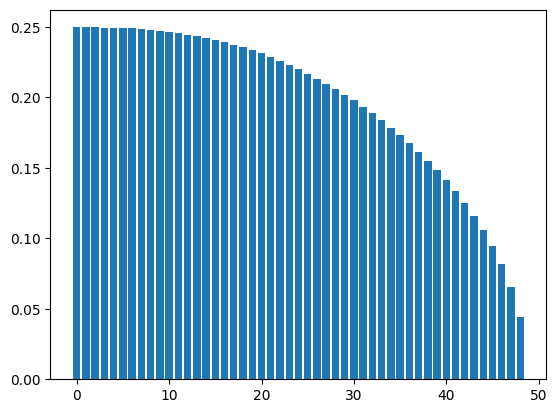

In [13]:
import matplotlib.pyplot as plt
plt.bar(range(len(diffs)), diffs)

In [14]:
from scipy.stats import ortho_group

# fakeU = [ortho_group.rvs(size) for size in (10, 20, 30)]
fakeU = [ortho_group.rvs(size) for size in A.shape]

G = A.copy()

for i in range(A.ndim):
    G = mode_n_product(G, fakeU[i].T, i)

In [15]:
A_ = G.copy()

for i in range(A_.ndim):
    A_ = mode_n_product(A_, fakeU[i], i)

In [16]:
A[0, 0]

array([0.57447501, 0.61769251, 0.00892258, 0.33743958, 0.85950244,
       0.1182456 , 0.56218253, 0.53517787, 0.26905995, 0.38527752,
       0.84144974, 0.0095757 , 0.16693551, 0.94244789, 0.24410654,
       0.54757196, 0.8199668 , 0.37224666, 0.01374689, 0.36847936,
       0.70957743, 0.33119884, 0.42386108, 0.77848736, 0.04975716,
       0.29252485, 0.22349646, 0.05990492, 0.96343883, 0.35284918,
       0.81515279, 0.39064336, 0.10245162, 0.89859297, 0.38670952,
       0.811612  , 0.59511668, 0.14618685, 0.33445075, 0.90461573,
       0.72867404, 0.31905089, 0.5653771 , 0.96343058, 0.53978706,
       0.02682899, 0.42545996, 0.09451814, 0.17088002, 0.90096552])

In [17]:
A_[0, 0]

array([0.57447501, 0.61769251, 0.00892258, 0.33743958, 0.85950244,
       0.1182456 , 0.56218253, 0.53517787, 0.26905995, 0.38527752,
       0.84144974, 0.0095757 , 0.16693551, 0.94244789, 0.24410654,
       0.54757196, 0.8199668 , 0.37224666, 0.01374689, 0.36847936,
       0.70957743, 0.33119884, 0.42386108, 0.77848736, 0.04975716,
       0.29252485, 0.22349646, 0.05990492, 0.96343883, 0.35284918,
       0.81515279, 0.39064336, 0.10245162, 0.89859297, 0.38670952,
       0.811612  , 0.59511668, 0.14618685, 0.33445075, 0.90461573,
       0.72867404, 0.31905089, 0.5653771 , 0.96343058, 0.53978706,
       0.02682899, 0.42545996, 0.09451814, 0.17088002, 0.90096552])

In [18]:
# U_trunk = [U[i][:, :U[i].shape[-1]//2] for i in range(A.ndim)]
U_trunk = [fakeU[i][:, :-3] for i in range(A.ndim)]
G = A.copy()

for i in range(A.ndim):
    G = mode_n_product(G, U_trunk[i].T, i)

A_ = G.copy()

for i in range(A_.ndim):
    A_ = mode_n_product(A_, U_trunk[i], i)

In [19]:
((A - A_)**2).mean()

0.04075675381944438

In [20]:
diffs = list()

for i in range(1, U[0].shape[1]):
    U_trunk = [fakeU[j][:, :i] for j in range(A.ndim)]
    G = A.copy()

    for i in range(A.ndim):
        G = mode_n_product(G, U_trunk[i].T, i)

    A_ = G.copy()

    for i in range(A_.ndim):
        A_ = mode_n_product(A_, U_trunk[i], i)

    # diffs.append(((A - A_)**2).mean())
    diffs.append((np.abs((A - A_))).mean())

<BarContainer object of 49 artists>

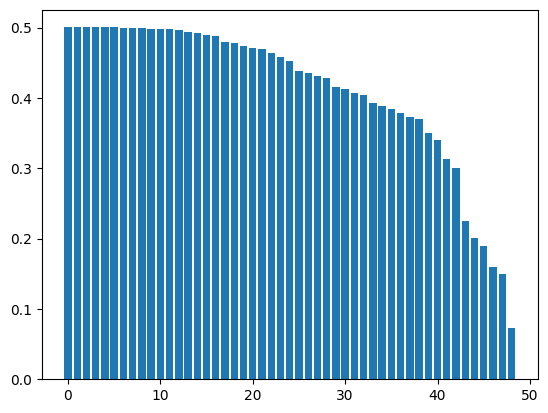

In [21]:
import matplotlib.pyplot as plt
plt.bar(range(len(diffs)), diffs)

In [22]:
a = np.random.randn(50, 50)

U, S, Vh = np.linalg.svd(a, full_matrices=False)


np.allclose(a, np.dot(U * S, Vh))

True

<BarContainer object of 49 artists>

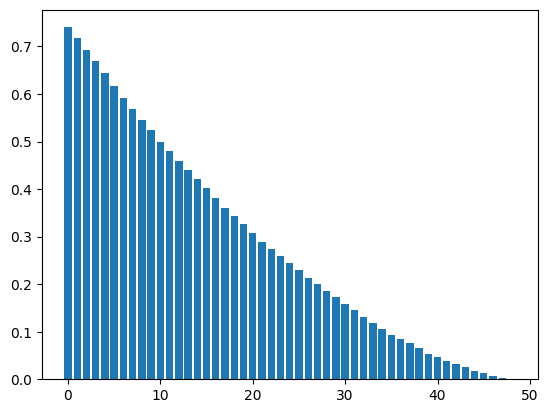

In [23]:
diffs = list()
for i in range(1, a.shape[0]):
    a_ = np.dot(U[:, :i] * S[:i], Vh[:i])
    diffs.append((np.abs((a - a_))).mean())

plt.bar(range(len(diffs)), diffs)

In [26]:
def mode_n_flattening(arr, mode):
    """
    Perform mode-n flattening on a NumPy array.

    Parameters:
    - arr (ndarray): Input NumPy array.
    - mode (int): The mode to flatten along (0-based index).

    Returns:
    - flattened_arr (ndarray): Flattened array.
    """
    if mode < 0 or mode >= arr.ndim:
        raise ValueError('Invalid mode value.')

    # Permute the mode axis to the front
    permuted_arr = np.moveaxis(arr, mode, 0)

    # Reshape the array
    flattened_arr = permuted_arr.reshape(permuted_arr.shape[0], -1)

    return flattened_arr

def mode_n_product(x, m, mode):
    """
    Perform mode-n product (matrix multiplication) on a NumPy array.

    Parameters:
    - x (ndarray): Input NumPy array.
    - m (ndarray): Matrix to multiply with.
    - mode (int): The mode to multiply along (0-based index).

    Returns:
    - result (ndarray): Result of the mode-n product.
    """
    x = np.asarray(x)
    m = np.asarray(m)

    if mode < 0:
        raise ValueError('`mode` must be a positive interger')
    if x.ndim < mode:
        raise ValueError('Invalid shape of X for mode = {}: {}'.format(mode, x.shape))
    if m.ndim != 2:
        raise ValueError('Invalid shape of M: {}'.format(m.shape))

    return np.swapaxes(np.swapaxes(x, mode, -1).dot(m.T), mode, -1)

def HOSVD(A):
    """
    Perform Higher Order Singular Value Decomposition (HOSVD) on a NumPy array.

    Parameters:
    - A (ndarray): Input NumPy array.

    Returns:
    - S (ndarray): Core tensor after HOSVD.
    - U (list): List of orthogonal matrices U (factors) after HOSVD.
    """
    U = []

    for i in range(A.ndim):
        Am = mode_n_flattening(A, i)
        Um, Sm, Vhm = np.linalg.svd(Am, full_matrices=True)
        U.append(Um)

    S = A.copy()

    for i in range(A.ndim):
        S = mode_n_product(S, U[i].T, i)

    return S, U

In [33]:
A = np.random.random((10, 20, 30))
S, U = HOSVD(A)

A_ = S.copy()
for i in range(A_.ndim):
    A_ = mode_n_product(A_, U[i], i)

np.all(np.isclose(A, A_))

True

In [29]:
def eye_multidim(dim: int, n: int) -> np.ndarray:
    """
    Creates a multidimensional identity matrix.

    Args:
    - dim: An integer representing the dimension of the identity matrix.
    - n: An integer representing the number of dimensions of the identity matrix
    """
    out = np.zeros((dim,)*n)
    for i in range(dim):
        out[*(i for _ in range(n))] = 1.
    return out


I = eye_multidim(3, 3)
A = np.random.randint(1, 10, (3, 3, 3))

In [30]:
h = [A[i] for i in range(A.shape[0])]
l = [A[:, i] for i in range(A.shape[1])]
f = [A[:, :, i] for i in range(A.shape[2])]

ih = [I[i] for i in range(I.shape[0])]
il = [I[:, i] for i in range(I.shape[1])]
if_ = [I[:, :, i] for i in range(I.shape[2])]

In [63]:
col_1 = A[:, 0, 0]
icol_1 = I[:, 0, 0]
fib_1 = A[0, :, 0]
ifib_1 = I[0, :, 0]
tube_1 = A[0, 0, :]
itube_1 = I[0, 0, :]

In [66]:
fib_1@icol_1

4.0

In [67]:
icol_1@itube_1

1.0

In [65]:
fib_1@itube_1

4.0

In [35]:
h[0].shape, l[0].shape, f[0].shape, ih[0].shape, il[0].shape, if_[0].shape

((3, 3), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3))

In [33]:
A[0, 0, 0]

4

In [37]:
h[0]@ih[0]

array([[4., 0., 0.],
       [6., 0., 0.],
       [8., 0., 0.]])

In [45]:
l[0]@if_[0]

array([[4., 0., 0.],
       [9., 0., 0.],
       [6., 0., 0.]])

In [42]:
f[0]@ih[0]

array([[4., 0., 0.],
       [9., 0., 0.],
       [6., 0., 0.]])

In [2]:
# differentiation multiplication


a1 = 10*np.random.random((1, 10))
a2 = a1 + 0.001*np.random.random((1, 10))

b1 = 10*np.random.random((10, 1))
b2 = b1 + 0.001*np.random.random((10, 1))

c1 = a2@b2 - a1@b1
c1

array([[0.05173851]])

In [3]:
c2 = (a2 - a1)@b2 + a2@(b2 - b1)
c2

array([[0.05174046]])

In [4]:
a1 = 10*np.random.random((5, 10))
a2 = a1 + 0.001*np.random.random((5, 10))

b1 = 10*np.random.random((10, 20))
b2 = b1 + 0.001*np.random.random((10, 20))

c1 = a2@b2 - a1@b1
c1

array([[0.04449175, 0.05939148, 0.05369879, 0.06799721, 0.05450574,
        0.06214385, 0.05643205, 0.06449977, 0.05314257, 0.05717672,
        0.07005559, 0.04840481, 0.06179925, 0.06469707, 0.04847864,
        0.05957633, 0.06064597, 0.0480004 , 0.04477215, 0.07041281],
       [0.03836803, 0.04201024, 0.03543289, 0.04586967, 0.04132823,
        0.04603846, 0.04383174, 0.04574146, 0.03874925, 0.03917816,
        0.04406474, 0.03611389, 0.04529559, 0.04108929, 0.03690536,
        0.04289988, 0.04348158, 0.03313859, 0.03176463, 0.04730019],
       [0.03310435, 0.03646146, 0.02800112, 0.03979559, 0.03793036,
        0.04057298, 0.03000777, 0.04017689, 0.0356539 , 0.03195892,
        0.04352406, 0.03922816, 0.03718039, 0.03739083, 0.03358091,
        0.03987727, 0.04117023, 0.03359366, 0.02504525, 0.04758597],
       [0.05136477, 0.04838829, 0.04356262, 0.05163256, 0.0475218 ,
        0.06238255, 0.0534851 , 0.05884475, 0.04425843, 0.05026677,
        0.05613407, 0.0446771 , 0.05748578, 0

In [5]:
c2 = (a2 - a1)@b1 + a1@(b2 - b1)
c2

array([[0.04448875, 0.0593887 , 0.05369669, 0.06799489, 0.05450317,
        0.06214145, 0.05642905, 0.06449689, 0.05314005, 0.05717344,
        0.07005212, 0.04840304, 0.06179621, 0.06469387, 0.04847619,
        0.05957385, 0.06064252, 0.04799847, 0.04477032, 0.07040934],
       [0.03836615, 0.04200818, 0.03543105, 0.04586785, 0.04132632,
        0.04603669, 0.04382989, 0.04573924, 0.03874732, 0.03917571,
        0.04406242, 0.03611216, 0.04529326, 0.04108704, 0.03690339,
        0.04289823, 0.04347909, 0.03313725, 0.03176343, 0.04729791],
       [0.03310227, 0.03645901, 0.02799875, 0.03979347, 0.03792826,
        0.04057125, 0.0300059 , 0.0401743 , 0.03565165, 0.03195619,
        0.04352141, 0.03922603, 0.03717757, 0.03738823, 0.03357863,
        0.0398754 , 0.04116733, 0.03359203, 0.02504394, 0.04758351],
       [0.0513624 , 0.04838576, 0.04356046, 0.05163035, 0.0475198 ,
        0.06238041, 0.0534827 , 0.05884203, 0.04425664, 0.0502642 ,
        0.0561313 , 0.04467496, 0.05748267, 0

In [6]:
a1@(b2 - b1)

array([[0.02982621, 0.03529848, 0.03084699, 0.03066478, 0.02913558,
        0.0294143 , 0.03787929, 0.03377015, 0.03163801, 0.04001102,
        0.04050548, 0.01905534, 0.03773221, 0.03529421, 0.02683101,
        0.02874652, 0.03835543, 0.02711517, 0.02375573, 0.03583218],
       [0.02512787, 0.02277078, 0.02184622, 0.02023291, 0.02283014,
        0.02239859, 0.030045  , 0.0246254 , 0.02405636, 0.02703583,
        0.0240831 , 0.0149953 , 0.0253159 , 0.02099465, 0.02217917,
        0.02137552, 0.025523  , 0.01632777, 0.01724313, 0.02335387],
       [0.01473124, 0.01414605, 0.01396339, 0.01376286, 0.01548378,
        0.01439026, 0.01564149, 0.01753399, 0.01734686, 0.02076289,
        0.01979754, 0.01238875, 0.01511145, 0.0174002 , 0.01512551,
        0.01264842, 0.01883517, 0.01171976, 0.00841014, 0.01976835],
       [0.03270126, 0.02959236, 0.02859872, 0.0261732 , 0.02702885,
        0.03204601, 0.03990125, 0.03384188, 0.02679252, 0.0334473 ,
        0.03178723, 0.0208718 , 0.03585476, 0

In [7]:
(a2 - a1)@(b1)

array([[0.01466254, 0.02409022, 0.0228497 , 0.03733011, 0.02536759,
        0.03272714, 0.01854976, 0.03072674, 0.02150205, 0.01716242,
        0.02954663, 0.0293477 , 0.02406401, 0.02939966, 0.02164518,
        0.03082732, 0.02228709, 0.0208833 , 0.0210146 , 0.03457716],
       [0.01323827, 0.0192374 , 0.01358483, 0.02563495, 0.01849618,
        0.0236381 , 0.01378488, 0.02111384, 0.01469096, 0.01213988,
        0.01997932, 0.02111686, 0.01997736, 0.02009239, 0.01472422,
        0.02152271, 0.01795609, 0.01680948, 0.0145203 , 0.02394404],
       [0.01837103, 0.02231296, 0.01403536, 0.02603061, 0.02244448,
        0.02618099, 0.0143644 , 0.02264032, 0.01830479, 0.0111933 ,
        0.02372388, 0.02683727, 0.02206612, 0.01998803, 0.01845313,
        0.02722698, 0.02233216, 0.02187227, 0.01663379, 0.02781516],
       [0.01866114, 0.0187934 , 0.01496174, 0.02545716, 0.02049095,
        0.0303344 , 0.01358145, 0.02500014, 0.01746413, 0.0168169 ,
        0.02434408, 0.02380316, 0.02162791, 0

In [8]:
(a2@b1 - a1@b1)

array([[0.01466254, 0.02409022, 0.0228497 , 0.03733011, 0.02536759,
        0.03272714, 0.01854976, 0.03072674, 0.02150205, 0.01716242,
        0.02954663, 0.0293477 , 0.02406401, 0.02939966, 0.02164518,
        0.03082732, 0.02228709, 0.0208833 , 0.0210146 , 0.03457716],
       [0.01323827, 0.0192374 , 0.01358483, 0.02563495, 0.01849618,
        0.0236381 , 0.01378488, 0.02111384, 0.01469096, 0.01213988,
        0.01997932, 0.02111686, 0.01997736, 0.02009239, 0.01472422,
        0.02152271, 0.01795609, 0.01680948, 0.0145203 , 0.02394404],
       [0.01837103, 0.02231296, 0.01403536, 0.02603061, 0.02244448,
        0.02618099, 0.0143644 , 0.02264032, 0.01830479, 0.0111933 ,
        0.02372388, 0.02683727, 0.02206612, 0.01998803, 0.01845313,
        0.02722698, 0.02233216, 0.02187227, 0.01663379, 0.02781516],
       [0.01866114, 0.0187934 , 0.01496174, 0.02545716, 0.02049095,
        0.0303344 , 0.01358145, 0.02500014, 0.01746413, 0.0168169 ,
        0.02434408, 0.02380316, 0.02162791, 0

In [9]:
(a2 - a1)@(b2 - b1)

array([[3.00028711e-06, 2.78349863e-06, 2.10147392e-06, 2.31998736e-06,
        2.57133687e-06, 2.39840349e-06, 3.00297369e-06, 2.87698439e-06,
        2.51933123e-06, 3.27849718e-06, 3.47899707e-06, 1.76244828e-06,
        3.03474342e-06, 3.19895184e-06, 2.44733907e-06, 2.48725086e-06,
        3.45114581e-06, 1.92955408e-06, 1.82598109e-06, 3.47290144e-06],
       [1.88708609e-06, 2.06168226e-06, 1.83592975e-06, 1.81551748e-06,
        1.90534972e-06, 1.76532089e-06, 1.85599005e-06, 2.22241417e-06,
        1.93118181e-06, 2.45409602e-06, 2.32110824e-06, 1.73193990e-06,
        2.33510997e-06, 2.25410462e-06, 1.97088785e-06, 1.64923437e-06,
        2.49186265e-06, 1.34158959e-06, 1.20501625e-06, 2.27863681e-06],
       [2.08005599e-06, 2.44827669e-06, 2.36995939e-06, 2.11930422e-06,
        2.10452424e-06, 1.72158448e-06, 1.87052129e-06, 2.58175392e-06,
        2.25567796e-06, 2.73152406e-06, 2.64694779e-06, 2.13626392e-06,
        2.81595947e-06, 2.60347214e-06, 2.27564449e-06, 1.8748

In [14]:
a2@b2 - a2@b1 - a1@b2 + a1@b1

array([[3.00028708e-06, 2.78349847e-06, 2.10147380e-06, 2.31998729e-06,
        2.57133684e-06, 2.39840347e-06, 3.00297367e-06, 2.87698424e-06,
        2.51933119e-06, 3.27849719e-06, 3.47899709e-06, 1.76244833e-06,
        3.03474337e-06, 3.19895184e-06, 2.44733911e-06, 2.48725098e-06,
        3.45114597e-06, 1.92955417e-06, 1.82598114e-06, 3.47290148e-06],
       [1.88708611e-06, 2.06168224e-06, 1.83592979e-06, 1.81551746e-06,
        1.90534976e-06, 1.76532092e-06, 1.85599006e-06, 2.22241417e-06,
        1.93118180e-06, 2.45409603e-06, 2.32110830e-06, 1.73193985e-06,
        2.33510997e-06, 2.25410460e-06, 1.97088787e-06, 1.64923438e-06,
        2.49186263e-06, 1.34158967e-06, 1.20501628e-06, 2.27863688e-06],
       [2.08005599e-06, 2.44827669e-06, 2.36995936e-06, 2.11930427e-06,
        2.10452421e-06, 1.72158451e-06, 1.87052132e-06, 2.58175393e-06,
        2.25567794e-06, 2.73152408e-06, 2.64694785e-06, 2.13626384e-06,
        2.81595945e-06, 2.60347215e-06, 2.27564450e-06, 1.8748

In [33]:
x_t = np.random.random((1, 10))
x_t_1 = np.random.random((1, 10))

a_t = np.random.random((1, 10))
a_t_1 = np.random.random((1, 10))

w_t = np.random.random((10, 1))
w_t_1 = np.random.random((10, 1))

s_t = np.random.random((1, 1))
s_t_1 = np.random.random((1, 1))
eps_t = np.random.random((1, 10))
eps_t_1 = np.random.random((1, 10))

In [85]:
a = np.random.random((5, 10))
b = np.random.random((5, 10))
(a - b).T

array([[ 0.07168926,  0.14320213, -0.8295042 , -0.41933851, -0.65404259],
       [ 0.70506119, -0.19565389,  0.39474206, -0.4016596 ,  0.0886094 ],
       [-0.1299418 , -0.10437125, -0.78168037,  0.51431718,  0.11713401],
       [-0.52717991,  0.70579186,  0.02646478,  0.00472338, -0.43797087],
       [-0.39328169,  0.23688241, -0.19325382, -0.1938604 ,  0.02170094],
       [ 0.08850792,  0.92564637, -0.1562586 ,  0.5687426 , -0.43256047],
       [-0.03337273, -0.3614719 , -0.47873037, -0.4184401 , -0.48274805],
       [ 0.36092305,  0.14415517, -0.3718051 , -0.09480789,  0.01590275],
       [-0.04360167,  0.38490622, -0.40978366, -0.23946995,  0.67714152],
       [-0.24265635,  0.06638748, -0.83549122,  0.38222967, -0.52130857]])

In [40]:
a.T - b.T

array([[-0.41277596, -0.39558358, -0.78110075, -0.28713429, -0.14212757],
       [-0.05508666, -0.11385692, -0.44569897, -0.48373475,  0.58736216],
       [-0.5453994 ,  0.66271716,  0.76413059,  0.30910238,  0.0978089 ],
       [-0.24706906, -0.18490561,  0.22438054, -0.09706014,  0.4428154 ],
       [ 0.27617699,  0.01113852, -0.30213424,  0.42556304,  0.52469917],
       [ 0.3374544 , -0.64297798,  0.23966043, -0.48022626,  0.60900383],
       [-0.05586166, -0.46910071, -0.66458443, -0.85399799,  0.27285449],
       [-0.30339113,  0.61544796, -0.46728703, -0.27704818,  0.35389439],
       [ 0.10241229, -0.21806047, -0.58011637, -0.05199385,  0.43426063],
       [-0.06253978,  0.28400589, -0.1085013 , -0.3197309 ,  0.05008898]])

In [104]:
a = np.random.random((5, 10))
np.cov(a)

array([[ 0.06744899,  0.00628581,  0.02914325, -0.01793732,  0.03918172],
       [ 0.00628581,  0.09108296, -0.02426678,  0.03386015,  0.00291077],
       [ 0.02914325, -0.02426678,  0.06319718, -0.00796385,  0.0021808 ],
       [-0.01793732,  0.03386015, -0.00796385,  0.07812982, -0.02351972],
       [ 0.03918172,  0.00291077,  0.0021808 , -0.02351972,  0.10016345]])

In [105]:
a -= a.mean(-1, keepdims=True)

In [102]:
a.mean()

1.3322676295501878e-17

In [94]:
a.shape

(5, 10)

In [106]:
(a@a.T)/(a.shape[-1] - 1)

array([[ 0.06744899,  0.00628581,  0.02914325, -0.01793732,  0.03918172],
       [ 0.00628581,  0.09108296, -0.02426678,  0.03386015,  0.00291077],
       [ 0.02914325, -0.02426678,  0.06319718, -0.00796385,  0.0021808 ],
       [-0.01793732,  0.03386015, -0.00796385,  0.07812982, -0.02351972],
       [ 0.03918172,  0.00291077,  0.0021808 , -0.02351972,  0.10016345]])

In [107]:
a = np.random.random((5, 10))
b = np.random.random((5, 10))

In [108]:
a@b.T

array([[1.37568587, 2.28340648, 2.06238154, 2.5617412 , 1.77559951],
       [1.6640838 , 1.65903787, 2.12174514, 2.23144662, 1.89916396],
       [1.52077336, 2.007966  , 1.89663332, 2.44804186, 1.12331566],
       [1.82146876, 2.78598609, 2.29101007, 2.77122352, 1.95976449],
       [1.34609473, 2.19514944, 2.23096228, 2.84184041, 1.8971142 ]])

In [110]:
(b@a.T).T

array([[1.37568587, 2.28340648, 2.06238154, 2.5617412 , 1.77559951],
       [1.6640838 , 1.65903787, 2.12174514, 2.23144662, 1.89916396],
       [1.52077336, 2.007966  , 1.89663332, 2.44804186, 1.12331566],
       [1.82146876, 2.78598609, 2.29101007, 2.77122352, 1.95976449],
       [1.34609473, 2.19514944, 2.23096228, 2.84184041, 1.8971142 ]])

In [5]:
a = np.random.random((10, 10))
b = np.random.random((10, 10))

In [6]:
a + b.T

array([[0.95491102, 0.69652796, 1.89818   , 0.65400462, 1.19090199,
        1.20313177, 0.56284511, 1.38808705, 1.30233566, 0.61021653],
       [0.41751496, 1.53332718, 0.95056663, 0.7936403 , 1.64510586,
        1.26744108, 1.75268618, 1.03887501, 0.99593611, 1.03044071],
       [0.65286666, 1.19625849, 1.16758755, 0.71714329, 0.47824474,
        0.63581081, 1.56919508, 1.0407593 , 1.8555057 , 0.13087259],
       [1.6068279 , 1.39490392, 1.06358371, 0.75783607, 1.24805578,
        0.87939711, 1.09960262, 0.96638748, 1.01566852, 0.5649828 ],
       [0.8780191 , 0.85776134, 0.49160758, 1.20017926, 1.34863367,
        1.09861724, 1.40469401, 1.53069297, 1.86321135, 0.57060042],
       [1.11463382, 1.09543713, 1.41038991, 0.23727486, 1.06747316,
        1.04370291, 1.17700408, 1.87830393, 1.18679199, 1.06104585],
       [0.10649221, 0.55348561, 1.8767085 , 0.70680158, 0.95347482,
        0.77025464, 1.04705933, 0.96418171, 1.01111075, 0.31858638],
       [1.16535227, 1.33469062, 0.4986356

In [8]:
(a.T + b).T

array([[0.95491102, 0.69652796, 1.89818   , 0.65400462, 1.19090199,
        1.20313177, 0.56284511, 1.38808705, 1.30233566, 0.61021653],
       [0.41751496, 1.53332718, 0.95056663, 0.7936403 , 1.64510586,
        1.26744108, 1.75268618, 1.03887501, 0.99593611, 1.03044071],
       [0.65286666, 1.19625849, 1.16758755, 0.71714329, 0.47824474,
        0.63581081, 1.56919508, 1.0407593 , 1.8555057 , 0.13087259],
       [1.6068279 , 1.39490392, 1.06358371, 0.75783607, 1.24805578,
        0.87939711, 1.09960262, 0.96638748, 1.01566852, 0.5649828 ],
       [0.8780191 , 0.85776134, 0.49160758, 1.20017926, 1.34863367,
        1.09861724, 1.40469401, 1.53069297, 1.86321135, 0.57060042],
       [1.11463382, 1.09543713, 1.41038991, 0.23727486, 1.06747316,
        1.04370291, 1.17700408, 1.87830393, 1.18679199, 1.06104585],
       [0.10649221, 0.55348561, 1.8767085 , 0.70680158, 0.95347482,
        0.77025464, 1.04705933, 0.96418171, 1.01111075, 0.31858638],
       [1.16535227, 1.33469062, 0.4986356

In [10]:
(a + b).T

array([[0.95491102, 0.98329588, 1.60168185, 1.46105266, 0.95521215,
        1.16294677, 0.11537478, 1.42584316, 1.21886306, 0.43446167],
       [0.13074704, 1.53332718, 0.85816073, 1.42243337, 1.27340185,
        1.06625505, 1.23725415, 1.72067531, 0.68488958, 1.40939551],
       [0.94936481, 1.28866439, 1.16758755, 1.24226022, 0.27942964,
        1.22441469, 1.46690466, 0.78692929, 1.26980598, 0.19867726],
       [0.79977986, 0.76611085, 0.53846678, 0.75783607, 1.43018989,
        0.1761924 , 0.7585907 , 0.64319455, 0.17070089, 1.42496929],
       [1.11370894, 1.22946534, 0.69042268, 1.01804515, 1.34863367,
        1.49790334, 1.03464668, 1.11455774, 1.68498042, 0.89397186],
       [1.15481883, 1.29662316, 0.82178603, 0.94047957, 0.66818707,
        1.04370291, 0.43604855, 1.34197095, 1.23621918, 1.61032541],
       [0.55396254, 1.06891765, 1.97899892, 1.0478135 , 1.32352216,
        1.51121017, 1.04705933, 0.62963416, 0.82750238, 1.01130411],
       [1.12759615, 0.65289031, 0.7524656

In [11]:
a.T + b.T

array([[0.95491102, 0.98329588, 1.60168185, 1.46105266, 0.95521215,
        1.16294677, 0.11537478, 1.42584316, 1.21886306, 0.43446167],
       [0.13074704, 1.53332718, 0.85816073, 1.42243337, 1.27340185,
        1.06625505, 1.23725415, 1.72067531, 0.68488958, 1.40939551],
       [0.94936481, 1.28866439, 1.16758755, 1.24226022, 0.27942964,
        1.22441469, 1.46690466, 0.78692929, 1.26980598, 0.19867726],
       [0.79977986, 0.76611085, 0.53846678, 0.75783607, 1.43018989,
        0.1761924 , 0.7585907 , 0.64319455, 0.17070089, 1.42496929],
       [1.11370894, 1.22946534, 0.69042268, 1.01804515, 1.34863367,
        1.49790334, 1.03464668, 1.11455774, 1.68498042, 0.89397186],
       [1.15481883, 1.29662316, 0.82178603, 0.94047957, 0.66818707,
        1.04370291, 0.43604855, 1.34197095, 1.23621918, 1.61032541],
       [0.55396254, 1.06891765, 1.97899892, 1.0478135 , 1.32352216,
        1.51121017, 1.04705933, 0.62963416, 0.82750238, 1.01130411],
       [1.12759615, 0.65289031, 0.7524656

In [164]:
a, b = np.random.random((5, 10)), np.random.random((10, 5))
d = a@b
b

array([[0.27062919, 0.17532872, 0.45848839, 0.3217498 , 0.97661484],
       [0.3433294 , 0.82069625, 0.17973139, 0.43780412, 0.32194826],
       [0.20732634, 0.99826109, 0.00332426, 0.29826819, 0.52436505],
       [0.67193047, 0.57483201, 0.43797213, 0.05730434, 0.51094665],
       [0.65855705, 0.37903851, 0.82303003, 0.82956494, 0.23682024],
       [0.38909811, 0.92271   , 0.51485132, 0.04353638, 0.59256423],
       [0.63138912, 0.8784384 , 0.22337985, 0.23289468, 0.9432539 ],
       [0.94296389, 0.92599338, 0.30678702, 0.56696704, 0.86959021],
       [0.59496747, 0.72536575, 0.67820165, 0.82526677, 0.57489967],
       [0.6219397 , 0.84168434, 0.64470391, 0.40919399, 0.87085107]])

In [165]:
b_ = np.linalg.pinv(a)@d
b_

array([[ 0.47990975,  0.29981464,  0.54917696,  0.34802064,  0.78585171],
       [ 0.73773794,  0.88504347,  0.41171203,  0.59814946,  0.74129208],
       [ 0.53306444,  1.09467357,  0.45551172,  0.54811912,  0.66264932],
       [ 0.52850255,  0.54414647,  0.28745692, -0.02412769,  0.70912724],
       [ 0.24497846,  0.18663886,  0.36362972,  0.53884849,  0.30027249],
       [ 0.34503556,  0.95624326,  0.43047921,  0.06344684,  0.74921072],
       [ 0.47513263,  0.74461232,  0.28542651,  0.24278419,  0.74916745],
       [ 0.76445419,  0.92652426,  0.44111228,  0.71637306,  0.6900793 ],
       [ 0.43073787,  0.75160418,  0.15009811,  0.46383615,  0.39447573],
       [ 0.38462379,  0.69881994,  0.28279761,  0.09737849,  0.45823208]])

In [174]:
a = np.random.random((5, 5))
b = np.random.random((5, 5))
c = np.random.random((5, 5))
d = np.random.random((5, 5))
e = np.random.random((5, 5))
f = np.random.random((5, 5))

In [175]:
a@b - d@b

array([[ 0.90398315,  0.72938395,  0.48061358,  0.78081462,  0.44305961],
       [ 0.20164757,  0.3018054 , -0.17434772,  0.39514467,  0.58688729],
       [-0.44485781, -0.57251918, -0.36116753, -0.37910865, -0.39706405],
       [ 0.55932032,  0.18420056, -0.22844438,  0.44913555,  0.39095718],
       [-0.72519092, -1.25655836, -1.29087651, -0.51090553, -0.50741431]])

In [176]:
(a - d)@b

array([[ 0.90398315,  0.72938395,  0.48061358,  0.78081462,  0.44305961],
       [ 0.20164757,  0.3018054 , -0.17434772,  0.39514467,  0.58688729],
       [-0.44485781, -0.57251918, -0.36116753, -0.37910865, -0.39706405],
       [ 0.55932032,  0.18420056, -0.22844438,  0.44913555,  0.39095718],
       [-0.72519092, -1.25655836, -1.29087651, -0.51090553, -0.50741431]])

In [177]:
a@b@c@d - a@b@c@e

array([[ 5.11818208, -1.81205382, -5.27638099, -0.19058114,  8.68783563],
       [ 4.51663149, -1.64093424, -4.50184612, -0.09615034,  7.51930277],
       [ 3.45849707, -1.12141812, -3.36167536, -0.07476403,  5.62642642],
       [ 5.06439824, -1.7934031 , -5.20140236, -0.16340259,  8.57470025],
       [ 2.85640449, -1.02141014, -2.88403427, -0.06634779,  4.78748525]])

In [489]:
a = np.random.random((5, 5))
b = np.random.random((5, 5))
c = np.random.random((5, 5))
d = np.random.random((5, 5))
a1 = a + 0.01*np.random.random((5, 5))
b1 = b + 0.01*np.random.random((5, 5))
c1 = c + 0.01*np.random.random((5, 5))
d1 = d + 0.01*np.random.random((5, 5))

In [490]:
# (a - a1)@b@b.T@d + a@(b - b1)@b.T@d + a@b@(b.T - b1.T)@d + a@b@b.T@(d - d1) = (d - d1)
(a - a1)@b@b.T@d + a@(b - b1)@b.T@d + a@b@(b.T - b1.T)@d + a@b@b.T@(d - d1) - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [491]:
(a - a1)@(b@b.T)@d + a@(b@b.T - b1@b.T)@d + a@(b@b.T - b@b1.T)@d + a@(b@b.T)@(d - d1) - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [492]:
(a - a1)@(b@b.T)@d + a@(b@b.T)@d - a@(b1@b.T)@d + a@(b@b.T)@d - a@(b@b1.T)@d + a@(b@b.T)@d - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [493]:
(4*a - a1)@(b@b.T)@d - a@(b1@b.T)@d - a@(b@b1.T)@d - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [494]:
(4*a - a1)@(b@b.T)@d - ( a@(b1@b.T + b@b1.T)@d ) - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [495]:
a@(b1@b.T)@d + a@(b@b1.T)@d

array([[10.47097291, 18.21190314, 11.24146253, 10.0049395 , 17.38996496],
       [11.09207132, 19.18616   , 11.93792254, 10.49908218, 18.45481712],
       [ 7.92880036, 14.06724721,  8.45683775,  7.52616582, 13.45730268],
       [13.17889608, 22.61259623, 14.23504042, 12.37049785, 21.9090997 ],
       [12.63547811, 22.12518521, 13.52506276, 12.12614209, 21.03800942]])

In [496]:
b1@b.T + b@b1.T

array([[4.0277604 , 2.40510138, 2.70651808, 1.86702421, 2.13440732],
       [2.40510138, 2.03803526, 1.78252511, 1.20890553, 1.73358812],
       [2.70651808, 1.78252511, 3.30889241, 2.81412861, 1.84610822],
       [1.86702421, 1.20890553, 2.81412861, 2.60373141, 1.38785485],
       [2.13440732, 1.73358812, 1.84610822, 1.38785485, 1.60286596]])

In [497]:
b@b.T + b1@b1.T - (b - b1)@(b - b1).T

array([[4.0277604 , 2.40510138, 2.70651808, 1.86702421, 2.13440732],
       [2.40510138, 2.03803526, 1.78252511, 1.20890553, 1.73358812],
       [2.70651808, 1.78252511, 3.30889241, 2.81412861, 1.84610822],
       [1.86702421, 1.20890553, 2.81412861, 2.60373141, 1.38785485],
       [2.13440732, 1.73358812, 1.84610822, 1.38785485, 1.60286596]])

In [498]:
(4*a - a1)@(b@b.T)@d - ( a@(b1@b.T + b@b1.T)@d ) - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [499]:
(4*a - a1)@(b@b.T)@d - ( a@(b@b.T + b1@b1.T - (b - b1)@(b - b1).T)@d ) - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [500]:
(4*a - a1)@b@b.T@d - a@b@b.T@d - a@b1@b1.T@d + a@(b - b1)@(b - b1).T@d  - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [519]:
db = b - b1

In [520]:
(4*a - a1)@b@b.T@d - a@b@b.T@d - a@b1@b1.T@d + a@db@db.T@d  - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [501]:
(3*a - a1)@b@b.T@d - a@b1@b1.T@d + a@(b - b1)@(b - b1).T@d  - a@(b@b.T)@d1 - (d - d1)

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [523]:
C = - a@b1@b1.T@d - (d - d1)

In [503]:
(3*a - a1)@b@b.T@d + a@(b - b1)@(b - b1).T@d  - a@b@b.T@d1 + C

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [504]:
(3*a - a1)@b@b.T@d + (a@b - a@b1)@(b.T@d - b1.T@d)  - a@b@b.T@d1 + C

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [512]:
3*a@b@b.T@d - a1@b@b.T@d + a@b@b.T@d - a@b@b1.T@d - a@b1@b.T@d + a@b1@b1.T@d - a@b@b.T@d1 + C

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [524]:
C_1 = C + a@b1@b1.T@d

In [525]:
4*a@b@b.T@d - a1@b@b.T@d - a@(b@b1.T + b1@b.T)@d - a@b@b.T@d1 + C_1

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [521]:
A = 4*a
B = d
C = a1
D = a
E = d1

In [527]:
# 4*a@b@b.T@d - a1@b@b.T@d - a@(b@b1.T + b1@b.T)@d - a@b@b.T@d1 + C_1 = 0
4*a@b@b.T@d - a1@b@b.T@d - a@(b@b1.T + b1@b.T)@d - a@b@b.T@d1 + C_1

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [531]:
4*a@b@b.T@d - a1@b@b.T@d - a@(b@b1.T + (b@b1.T).T)@d - a@b@b.T@d1 + C_1

array([[-0.25350929, -0.33346557, -0.26394343, -0.21463677, -0.30729176],
       [-0.28791101, -0.38530424, -0.29281935, -0.25060539, -0.35604765],
       [-0.20771686, -0.28976689, -0.21262055, -0.18236528, -0.27532002],
       [-0.32283462, -0.42509855, -0.32551638, -0.27220054, -0.39209169],
       [-0.27480217, -0.34812563, -0.27625384, -0.22688957, -0.31499786]])

In [532]:
b@b1.T + (b@b1.T).T

array([[4.0277604 , 2.40510138, 2.70651808, 1.86702421, 2.13440732],
       [2.40510138, 2.03803526, 1.78252511, 1.20890553, 1.73358812],
       [2.70651808, 1.78252511, 3.30889241, 2.81412861, 1.84610822],
       [1.86702421, 1.20890553, 2.81412861, 2.60373141, 1.38785485],
       [2.13440732, 1.73358812, 1.84610822, 1.38785485, 1.60286596]])

In [535]:
(b - b1)@b.T

array([[-0.01114422, -0.00554294, -0.01045986, -0.00760729, -0.0053123 ],
       [-0.0171436 , -0.01224541, -0.01841876, -0.01417058, -0.01201933],
       [-0.01207373, -0.00706241, -0.01657298, -0.01612234, -0.00852237],
       [-0.01205374, -0.00940494, -0.01282342, -0.01027413, -0.00883149],
       [-0.01090605, -0.00958912, -0.00846356, -0.00566764, -0.00877365]])

In [547]:
db@b.T

array([[-0.01114422, -0.00554294, -0.01045986, -0.00760729, -0.0053123 ],
       [-0.0171436 , -0.01224541, -0.01841876, -0.01417058, -0.01201933],
       [-0.01207373, -0.00706241, -0.01657298, -0.01612234, -0.00852237],
       [-0.01205374, -0.00940494, -0.01282342, -0.01027413, -0.00883149],
       [-0.01090605, -0.00958912, -0.00846356, -0.00566764, -0.00877365]])

In [537]:
b@b.T2

array([[2.00273598, 1.19120742, 1.34199224, 0.92368159, 1.05909449],
       [1.19120742, 1.00677222, 0.87852197, 0.592665  , 0.85598984],
       [1.34199224, 0.87852197, 1.63787322, 1.39259142, 0.91456115],
       [0.92368159, 0.592665  , 1.39259142, 1.29159157, 0.68667786],
       [1.05909449, 0.85598984, 0.91456115, 0.68667786, 0.79265933]])

In [538]:
b1@b.T

array([[2.0138802 , 1.19675036, 1.3524521 , 0.93128888, 1.06440678],
       [1.20835102, 1.01901763, 0.89694073, 0.60683559, 0.86800916],
       [1.35406598, 0.88558438, 1.65444621, 1.40871376, 0.92308351],
       [0.93573533, 0.60206994, 1.40541485, 1.30186571, 0.69550935],
       [1.07000053, 0.86557896, 0.92302471, 0.69234549, 0.80143298]])

In [546]:
b@b.T - db@b.T

array([[2.0138802 , 1.19675036, 1.3524521 , 0.93128888, 1.06440678],
       [1.20835102, 1.01901763, 0.89694073, 0.60683559, 0.86800916],
       [1.35406598, 0.88558438, 1.65444621, 1.40871376, 0.92308351],
       [0.93573533, 0.60206994, 1.40541485, 1.30186571, 0.69550935],
       [1.07000053, 0.86557896, 0.92302471, 0.69234549, 0.80143298]])

In [540]:
# b@b1.T + (b@b1.T).T =
b@b.T + b1@b1.T - (b - b1)@(b - b1).T

array([[4.0277604 , 2.40510138, 2.70651808, 1.86702421, 2.13440732],
       [2.40510138, 2.03803526, 1.78252511, 1.20890553, 1.73358812],
       [2.70651808, 1.78252511, 3.30889241, 2.81412861, 1.84610822],
       [1.86702421, 1.20890553, 2.81412861, 2.60373141, 1.38785485],
       [2.13440732, 1.73358812, 1.84610822, 1.38785485, 1.60286596]])

In [581]:
b@b1.T + b1@b.T

array([[4.0277604 , 2.40510138, 2.70651808, 1.86702421, 2.13440732],
       [2.40510138, 2.03803526, 1.78252511, 1.20890553, 1.73358812],
       [2.70651808, 1.78252511, 3.30889241, 2.81412861, 1.84610822],
       [1.86702421, 1.20890553, 2.81412861, 2.60373141, 1.38785485],
       [2.13440732, 1.73358812, 1.84610822, 1.38785485, 1.60286596]])